In [0]:
#Description: This program calculates Liveability Factor as good or bad
#                       using Artificial Neural Networks (ANN)

In [2]:
#import libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k
import datetime

Using TensorFlow backend.


In [4]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving liveability_dataset.csv to liveability_dataset.csv


In [5]:
df = pd.read_csv('liveability_dataset.csv')

#Print the first 5 rows
df.head()

,id,age,environment,sg,rating,ft,use,puse,pcc,bt,bgr,ta,crime,traffic,hg,publicspots,pft,distance,food,infrastructure,dm,cad,perf,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df.shape

(400, 26)

In [0]:
#Creating a list of column names to keep
columns_to_retain = ['environment','rating','crime','traffic','publicspots','distance','food','infrastructure','classification']

#Drop the columns that are not wanted in columns_to_retain
df = df.drop( [col for col in df.columns if not col in columns_to_retain] , axis=1 )

#Drop the rows with na or missing values
df = df.dropna(axis=0)

In [0]:
#Transform the non-numeric data in the columns
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform( df[column] )

In [10]:
#print the first 5 rows of the new cleaned data set
df.head()

,environment,rating,crime,traffic,publicspots,distance,food,infrastructure,classification
3,70.0,4.0,3.8,111.0,11.2,49,15,1,0
5,90.0,3.0,1.1,142.0,12.2,59,20,1,0
9,90.0,2.0,7.2,114.0,9.5,14,13,1,0
11,70.0,3.0,2.7,131.0,10.8,32,14,1,0
12,70.0,3.0,2.1,138.0,9.7,15,10,1,0


In [0]:
#Split the data into independent (X) data set -features  and (Y) data set -targets
X = df.drop(['classification'], axis=1)
Y = df['classification']

In [0]:
#Feature Scaling
#min-max scaler method scales the data set so that all the input features lie between 0 and 1
X_scaler = MinMaxScaler()
X_scaler.fit(X)
column_names = X.columns
X[column_names] = X_scaler.transform(X)

In [0]:
#Split the data into 80% training and 20% testing and Shuffle 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True)

In [0]:
#Build the model
model = Sequential()
model.add( Dense(256, input_dim= len(X.columns) , kernel_initializer= k.initializers.random_normal(seed=13), activation='relu') )
model.add( Dense(1, activation='hard_sigmoid') )

In [16]:
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
#Train the model
history = model.fit(X_train, Y_train, epochs = 1000, batch_size= X_train.shape[0])




Epoch 1/1000





168/168 [==============================] - 1s 3ms/step - loss: 0.6990 - acc: 0.4524
Epoch 2/1000
168/168 [==============================] - 0s 20us/step - loss: 0.6919 - acc: 0.6131
Epoch 3/1000
168/168 [==============================] - 0s 40us/step - loss: 0.6839 - acc: 0.6548
Epoch 4/1000
168/168 [==============================] - 0s 25us/step - loss: 0.6756 - acc: 0.6548
Epoch 5/1000
168/168 [==============================] - 0s 13us/step - loss: 0.6672 - acc: 0.6786
Epoch 6/1000
168/168 [==============================] - 0s 16us/step - loss: 0.6588 - acc: 0.7083
Epoch 7/1000
168/168 [==============================] - 0s 19us/step - loss: 0.6505 - acc: 0.7321
Epoch 8/1000
168/168 [==============================] - 0s 19us/step - loss: 0.6422 - acc: 0.7440
Epoch 9/1000
168/168 [==============================] - 0s 12us/step - loss: 0.6342 - acc: 0.7560
Epoch 10/1000
168/168 [==============================] - 0s 14us/step - loss: 0.6263 - acc: 0.7679
Epoch 11/100

Text(0.5, 0, 'epoch')

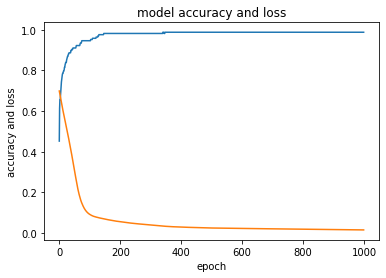

In [18]:
#Visualize the models loss and accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [19]:
print('shape of training data:', X_train.shape)
print('shape of test data:', X_test.shape)

shape of training data: (168, 8)
shape of test data: (43, 8)


In [21]:
#defining threshold as 0.5
pred = model.predict(X_test)
pred = [1 if y>=0.5 else 0 for y in pred]
pred

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1]

In [22]:
#Show the actual values
Y_test

270    1
252    1
366    1
387    1
329    1
3      0
277    1
320    1
386    1
289    1
92     0
20     0
379    1
299    1
80     0
281    1
353    1
352    1
18     0
246    0
24     0
48     0
325    1
176    0
54     0
258    1
377    1
354    1
94     0
196    0
189    0
190    0
364    1
337    1
133    0
278    1
108    0
308    1
359    1
313    1
259    1
397    1
385    1
Name: classification, dtype: int64

In [23]:
#Show the actual and predicted values
print('Original : {0}'.format(", ".join(str(x) for x in Y_test)))
print('Predicted : {0}'.format(", ".join(str(x) for x in pred)))

Original : 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1
Predicted : 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1


In [27]:
n = (Y_test == 1).sum()
n

27

In [28]:
m = (Y_test == 0).sum() + n
m

43

In [31]:
factor=(n*100)/m
factor

62.7906976744186

In [40]:
if factor <= 50:
 print("Below Average Liveability Factor");
elif factor>50 and factor<70:
 print("Average Liveability Factor");
elif factor>=70 and factor<80:
 print("Good Liveability Factor");
else:
 print("Excellent Liveability Factor");

Average Liveability Factor
